<a href="https://colab.research.google.com/github/AYALDAH/Memoire_de_fin_de_formation/blob/main/segmentation__client_maritime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projet : Segmentation Client

In [ ]:
!pip install --upgrade pandas-profiling
!pip install shap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport
import plotly.graph_objects as go
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.impute import KNNImputer
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster.silhouette import silhouette_visualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
import matplotlib as mpl
from yellowbrick.cluster.silhouette import silhouette_visualizer
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import time
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6e4b5721594ecd7c3256e6ff0575d94e6267da77f6aafbf553b2a49cf1d4667a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.1 MB/s eta 0:00:00


<ipython-input-1-23f423284c85>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Importation de la base de donnée


Analyse mensuelle du volume

In [ ]:
analyse_df=seg_df=pd.read_excel('analyse_volume.xlsx')
analyse_df

,Entité,Mois,Date,VOLUME,MONTANT_VENTES,Marge
0,RDT13,1,2023-01-01,809.065,67924.87,8284.52
1,RDT13,1,2023-01-02,259.649,60211.09,9301.42
2,RDT13,1,2023-01-03,499.608,203634.51,21540.46
3,RDT13,1,2023-01-04,648.342,142428.31,13279.06
4,RDT13,1,2023-01-05,208.040,105651.18,10110.11
...,...,...,...,...,...,...
1203,RDT95,8,2023-08-03,NaN,120.00,60.00
1204,RDT95,8,2023-08-05,NaN,2725.59,2.80
1205,RDT95,8,2023-08-14,NaN,60.00,30.00
1206,RDT95,8,2023-08-25,NaN,180.00,90.00


In [ ]:
analyse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Entité          1208 non-null   object        
 1   Mois            1208 non-null   int64         
 2   Date            1208 non-null   datetime64[ns]
 3   VOLUME          643 non-null    float64       
 4   MONTANT_VENTES  1208 non-null   float64       
 5   Marge           1208 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 56.8+ KB


In [ ]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")

analyse_df['VOLUME'] = imputer.fit_transform(analyse_df[['VOLUME']])
analyse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Entité          1208 non-null   object        
 1   Mois            1208 non-null   int64         
 2   Date            1208 non-null   datetime64[ns]
 3   VOLUME          1208 non-null   float64       
 4   MONTANT_VENTES  1208 non-null   float64       
 5   Marge           1208 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 56.8+ KB


In [ ]:
analyse_df=analyse_df[analyse_df["Entité"]!="RDT95"]

In [ ]:
analyse_df["Entité"] = analyse_df["Entité"].replace(["RDT13"], value = "MARSEILLE")
analyse_df["Entité"] = analyse_df["Entité"].replace(["RDT45"], value = "MONTOIR")
analyse_df["Entité"] = analyse_df["Entité"].replace(["RDT59"], value = "DUNKERQUE")
analyse_df["Entité"] = analyse_df["Entité"].replace(["RDT76"], value = "ROUEN")
analyse_df["Entité"] = analyse_df["Entité"].replace(["RDT76LEH"], value = "LE HAVRE")

In [ ]:
plt.figure(figsize=(12,14))
analyse_df['Date'] = pd.to_datetime(analyse_df['Date'])
monthly_data_grouped =analyse_df.resample('M', on='Date').mean()
fig = px.line(monthly_data_grouped, x=monthly_data_grouped.index, y='VOLUME', title='Monthly Evolution', markers=True)
fig.update_traces(texttemplate='%{y:.2f}', textposition='top center', mode='markers+lines+text')
fig.update_xaxes(
    dtick='M1',  # Marquer tous les mois
    tickformat='%b %Y',  # Format de l'étiquette (abrégé du mois et année)
    tickangle=45,  # Angle de rotation des étiquettes (facultatif)
)

fig.update_layout(width=700, height=500, bargap=0.1,
                  plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
fig.show()

<ipython-input-27-d429949518bf>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 1200x1400 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,14))
analyse_df['Date'] = pd.to_datetime(analyse_df['Date'])
monthly_data_grouped =analyse_df.resample('M', on='Date').mean()
fig = px.line(monthly_data_grouped, x=monthly_data_grouped.index, y='MONTANT_VENTES', title='Monthly Evolution', markers=True)
fig.update_traces(texttemplate='%{y:.2f}', textposition='top center', mode='markers+lines+text')
fig.update_xaxes(
    dtick='M1',  # Marquer tous les mois
    tickformat='%b %Y',  # Format de l'étiquette (abrégé du mois et année)
    tickangle=45,  # Angle de rotation des étiquettes (facultatif)
)

fig.update_layout(width=700, height=500, bargap=0.1,
                  plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
fig.show()

<ipython-input-28-8c8691c17b69>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 1200x1400 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,14))
analyse_df['Date'] = pd.to_datetime(analyse_df['Date'])
monthly_data_grouped =analyse_df.resample('M', on='Date').mean()
fig = px.line(monthly_data_grouped, x=monthly_data_grouped.index, y='Marge ', title='Monthly Evolution', markers=True)
fig.update_traces(texttemplate='%{y:.2f}', textposition='top center', mode='markers+lines+text')
fig.update_xaxes(
    dtick='M1',  # Marquer tous les mois
    tickformat='%b %Y',  # Format de l'étiquette (abrégé du mois et année)
    tickangle=45,  # Angle de rotation des étiquettes (facultatif)
)

fig.update_layout(width=700, height=500, bargap=0.1,
                  plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
fig.show()

<ipython-input-29-862d49e47b42>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 1200x1400 with 0 Axes>

In [ ]:

monthly_data_grouped = analyse_df.groupby(['Entité', pd.Grouper(key='Date', freq='M')])['VOLUME'].sum().reset_index()

# Création du graphique à barres empilées avec des couleurs personnalisées
fig = go.Figure()

colors = ['chocolate','Peru','darkorange','deepskyblue','silver','lightyellow']  # Liste de couleurs personnalisées

for i, entity in enumerate(monthly_data_grouped['Entité'].unique()):
    entity_data = monthly_data_grouped[monthly_data_grouped['Entité'] == entity]
    fig.add_trace(go.Bar(
        x=entity_data['Date'],
        y=entity_data['VOLUME'],
        name=entity,
        text=entity_data['Date'].dt.strftime('%b %Y'),  # Format du texte (mois)
        textposition='inside',
        marker_color=colors[i % len(colors)]  # Choisissez une couleur de la liste en boucle
    ))

# Définir la date de début (janvier) et la date de fin (septembre)
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-09-30')

fig.update_xaxes(
    range=[start_date, end_date],  # Plage de dates souhaitée
    dtick='M1',  # Marquer tous les mois
    tickformat='%b %Y',  # Format de l'étiquette (abrégé du mois et année)
    tickangle=45,  # Angle de rotation des étiquettes (facultatif)
)

# Personnaliser la mise en page pour enlever l'axe des abscisses
fig.update_layout(
    barmode='stack',
    title='Cascade Bar Chart by Site',
    xaxis_title='Date',
    yaxis_title='Volume',
    height=400,
    width=800,
    xaxis_showticklabels=False,  # Enlever les étiquettes de l'axe des abscisses
    xaxis_visible=False  # Rendre l'axe des abscisses invisible
)

fig.show()

Segmentation Client


In [ ]:
seg_df=pd.read_excel('data_seg_Maritime - Septembre.xlsx')
seg_df.rename(columns={"DOSSIER":"F"},inplace="TRUE")
seg_df.rename(columns={"Recence ":"R"},inplace="TRUE")
seg_df

,Entité,Code_Client,Nom_CLIENT,CA,F,Marge,R,Taux_marge,Date_Facture
0,RDT13,378,GREENLOG,10101.24,3,2617.71,8.0,0.259147,2023-09-22
1,RDT13,458,PONANT,296706.01,19,39179.20,3.0,0.132047,2023-09-27
2,RDT13,578,GLOBAL TRADE SERVICES SARL,1116.25,1,70.70,0.0,0.063337,2023-09-30
3,RDT13,625,NOVIA INDUSTRIES,21172.13,8,737.79,0.0,0.034847,2023-09-30
4,RDT13,835,GAIA INTERNATIONAL,2248.00,1,108.00,0.0,0.048043,2023-09-30
...,...,...,...,...,...,...,...,...,...
653,RDT76LEH,4996,MICR'EAU,5250.00,1,684.59,8.0,0.130398,2023-09-22
654,RDT76LEH,5577,TUSCOR LLOYDS UK LTD,13443.00,4,1131.00,1.0,0.084133,2023-09-29
655,RDT76LEH,5596,ROUSSELOT,6136.60,2,1000.60,1.0,0.163054,2023-09-29
656,RDT76LEH,5735,CARGO SERVICES FAR EAST LIMITED,1453.33,1,387.49,9.0,0.266622,2023-09-21


In [ ]:
seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Entité        658 non-null    object        
 1   Code_Client   658 non-null    int64         
 2   Nom_CLIENT    658 non-null    object        
 3   CA            658 non-null    float64       
 4   F             658 non-null    int64         
 5   Marge         658 non-null    float64       
 6   R             658 non-null    float64       
 7   Taux_marge    658 non-null    float64       
 8   Date_Facture  650 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 46.4+ KB


In [ ]:
#Imputation du CA, Marge et Taux de Marge
#imputer = KNNImputer(n_neighbors=2, weights="uniform")

#seg_df['CA'] = imputer.fit_transform(seg_df[['CA']])
#seg_df['Marge'] = imputer.fit_transform(seg_df[['Marge']])
#seg_df['Taux_marge'] = imputer.fit_transform(seg_df[['Taux_marge']])

In [ ]:
seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Entité        658 non-null    object        
 1   Code_Client   658 non-null    int64         
 2   Nom_CLIENT    658 non-null    object        
 3   CA            658 non-null    float64       
 4   F             658 non-null    int64         
 5   Marge         658 non-null    float64       
 6   R             658 non-null    float64       
 7   Taux_marge    658 non-null    float64       
 8   Date_Facture  650 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 46.4+ KB


In [ ]:
#Transformation des données
seg_df["R"] = seg_df["R"].replace(to_replace=-4, value = 0)
seg_df=seg_df[seg_df["R"]>0]
seg_df=seg_df[seg_df["R"]!=45199]
seg_df=seg_df[seg_df["Entité"]!="RDT95"]
seg_df=seg_df[seg_df["CA"]>0]

In [ ]:
seg_df["Entité"] = seg_df["Entité"].replace(["RDT13"], value = "MARSEILLE")
seg_df["Entité"] = seg_df["Entité"].replace(["RDT45"], value = "MONTOIR")
seg_df["Entité"] = seg_df["Entité"].replace(["RDT59"], value = "DUNKERQUE")
seg_df["Entité"] = seg_df["Entité"].replace(["RDT76"], value = "ROUEN")
seg_df["Entité"] = seg_df["Entité"].replace(["RDT76LEH"], value = "LE HAVRE")

Statitiques

In [ ]:
#Répartition des clients par entité
d_site = pd.DataFrame(seg_df["Entité"].value_counts()).sort_values(by='Entité', ascending=True)
fig = px.bar(d_site, x='Entité', y=d_site.index, orientation='h')
fig.update_layout(title = dict(text = "Graphique du pourcentage par Entité"))
fig.update_layout(title='Bar Plot', plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,1,1,0)', width=600, height=400, xaxis=dict(title="count"),  # Add x-axis label
                  yaxis=dict(title="Site"),)
fig.update_traces(marker_line_width=0, marker_opacity=0.7, marker_color='rgb(0,191,255)')
fig.show()

In [ ]:
#Répartition des clients par entité
seg_df1 =seg_df.groupby(['Entité'])['CA'].sum().reset_index()
seg_df1=seg_df1.sort_values(by='Entité').sort_values(by='CA', ascending=True)
fig = px.bar(seg_df1, x='CA', y="Entité", orientation='h')
fig.update_layout(title = dict(text = "Graphique du CA par Entité"))
fig.update_layout(title='Bar Plot', plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,1,1,0)', width=600, height=400, xaxis=dict(title="CA"),  # Add x-axis label
                  yaxis=dict(title="Site"),)
fig.update_traces(marker_line_width=0, marker_opacity=0.7, marker_color='rgb(255,69,0)')
fig.show()

In [ ]:
#Répartition des clients par entité
seg_df1 =seg_df.groupby(['Entité'])['Marge '].sum().reset_index()
seg_df1=seg_df1.sort_values(by='Entité').sort_values(by='Marge ', ascending=True)
fig = px.bar(seg_df1, x='Marge ', y="Entité", orientation='h')
fig.update_layout(title = dict(text = "Graphique de la Marge par Entité"))
fig.update_layout(title='Bar Plot', plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,1,1,0)', width=600, height=400, xaxis=dict(title="Marge"),  # Add x-axis label
                  yaxis=dict(title="Site"),)
fig.update_traces(marker_line_width=0, marker_opacity=0.7, marker_color='rgb(139,0,139)')
fig.show()

In [ ]:
#Taux de Marge Moyen par site
seg_df2 =seg_df.groupby(['Entité'])['Taux_marge'].mean().reset_index()

colors = ['deepskyblue', 'salmon','orange', 'powderblue',"firebrick", "mediumslateblue"]
explode = [0.1, 0]
fig = go.Figure()

# Create a pie chart
fig.add_trace(go.Pie(labels=seg_df2["Entité"], values=seg_df2["Taux_marge"],
                     marker=dict(colors=colors, line=dict(color='white', width=0)),
                     textinfo='percent+label', hole=0.3, sort=False,
                     pull=explode, textfont_size=12))  # Decrease the font size to 12

# Update layout and appearance of the plot
fig.update_layout(title=dict(text="Pie Chart"),
                  plot_bgcolor='rgba(0,0,0,0)',
                  paper_bgcolor='rgba(0,1,1,0)',
                  showlegend=False,  # Optional: Remove the legend
                  width=600, height=500,
                  xaxis=dict(showline=False, showgrid=False),  # Remove x-axis line and grid
                  yaxis=dict(showline=False, showgrid=False), # Remove y-axis line and grid
                  annotations=[dict(text='taux', x=0.50, y=0.50, font_size=20, showarrow=False)] )

# Show the plot
fig.show()

In [ ]:
# Trouver l'index de la ligne correspondant à la valeur maximale dans la colonne 'Frequence'
index_max_frequence = seg_df['F'].idxmax()

# Trouver le nom du client correspondant à l'index
nom_client_max_frequence = seg_df.loc[index_max_frequence,"Nom_CLIENT "]

# Afficher le nom du client ayant la fréquence maximale
print("Nom du client avec le maximum de Frequence :", nom_client_max_frequence)

Nom du client avec le maximum de Frequence : CLS OVERSEAS LTD


In [ ]:
index_min_Recence = seg_df['R'].idxmin()

# Trouver le nom du client correspondant à l'index
nom_client_min_Recence = seg_df.loc[index_min_Recence,"Nom_CLIENT "]

# Afficher le nom du client ayant la fréquence maximale
print("Nom du client le plus récent :", nom_client_min_Recence)

Nom du client le plus récent : ExtenC


In [ ]:
index_max_CA = seg_df['CA'].idxmax()

# Trouver le nom du client correspondant à l'index
nom_client_max_CA = seg_df.loc[index_max_CA,"Nom_CLIENT "]

# Afficher le nom du client ayant la fréquence maximale
print("Nom du client avec le plus grand CA  :", nom_client_max_CA)

Nom du client avec le plus grand CA  : PONANT


In [ ]:
# Fusionner 'seg_df' avec 'site_df' sur la colonne 'Client' pour obtenir le site

# Trouver le site du client ayant le CA maximum
Entité_client_max_CA = seg_df[seg_df["Nom_CLIENT "] == nom_client_max_CA]['Entité'].values[0]

# Afficher le site du client ayant le CA maximum
print("Site du client avec le plus grand CA :", Entité_client_max_CA)

Site du client avec le plus grand CA : MARSEILLE


In [ ]:
index_max_marge = seg_df['Marge '].idxmax()

# Trouver le nom du client correspondant à l'index
nom_client_max_marge = seg_df.loc[index_max_marge,"Nom_CLIENT "]

# Afficher le nom du client ayant la fréquence maximale
print("Nom du client avec la plus grande Marge   :", nom_client_max_marge)

Nom du client avec la plus grande Marge   : PONANT


In [ ]:
# Fusionner 'seg_df' avec 'site_df' sur la colonne 'Client' pour obtenir le site

# Trouver le site du client ayant le CA maximum
Entité_client_max_marge  = seg_df[seg_df["Nom_CLIENT "] == nom_client_max_marge]['Entité'].values[0]

# Afficher le site du client ayant le CA maximum
print("Site du client avec la plus grande marge :", Entité_client_max_marge )

Site du client avec la plus grande marge : MARSEILLE


Clustering RFM

In [ ]:
#Céation de la liste des scores
s1=np.full((1,seg_df.shape[0]-int(0.80*seg_df.shape[0])),1)
s2=np.full((1,int(0.2*seg_df.shape[0])),2)
s3=np.full((1,int(0.2*seg_df.shape[0])),3)
s4=np.full((1,int(0.2*seg_df.shape[0])),4)
s5=np.full((1,int(0.2*seg_df.shape[0])),5)
score=np.hstack((s1,s2,s3,s4,s5)).flatten()
score.shape

(575,)

In [ ]:
seg_df=seg_df.sort_values(by='R',ascending=False)
seg_df['r_score']=score
for i , j in zip (('F' ,'Marge '),('f_score','m_score')):
  seg_df= seg_df.sort_values(by=i)
  seg_df[j]=score

In [ ]:
seg_df


,Entité,Code_Client,Nom_CLIENT,CA,F,Marge,R,Taux_marge,Date_Facture,r_score,f_score,m_score
541,ROUEN,62063,"SINOTRANS ZHEJIANG CO, LTD WENZHOU",1410.75,2,-1550.52,17.000000,-1.099075,2023-09-13 00:00:00,2,4,1
508,ROUEN,49308,GEVEKO MARKINGS SAS,2604.00,1,-385.40,8.000000,-0.148003,2023-09-22 00:00:00,3,1,1
620,ROUEN,88389,LES CIMENTS DU SAHEL,4988.00,7,-330.43,3.000000,-0.066245,2023-09-27 00:00:00,5,5,1
385,ROUEN,5542,LYS PACKAGING,2163.00,1,-307.63,27.000000,-0.142224,2023-09-03 00:00:00,1,3,1
348,ROUEN,4006,SOLUTION IMPORT,5036.00,3,-229.50,6.000000,-0.045572,2023-09-24 00:00:00,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
245,MONTOIR,62100,MAKE DISTRIBUTION,137895.00,43,23117.06,3.000000,0.167642,2023-09-27 00:00:00,5,5,5
270,DUNKERQUE,5744,IKO AXTER AUSTRALIA,164669.17,4,26356.44,5.000000,0.160057,2023-09-25 00:00:00,4,5,5
216,MARSEILLE,88090,ExtenC,196244.95,70,32560.02,0.298924,0.165915,2023-09-29 16:49:33,5,5,5
565,ROUEN,70044,SMCI GROUPE CAILLE,146409.52,9,36517.75,1.000000,0.249422,2023-09-29 00:00:00,5,5,5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<Figure size 800x550 with 0 Axes>

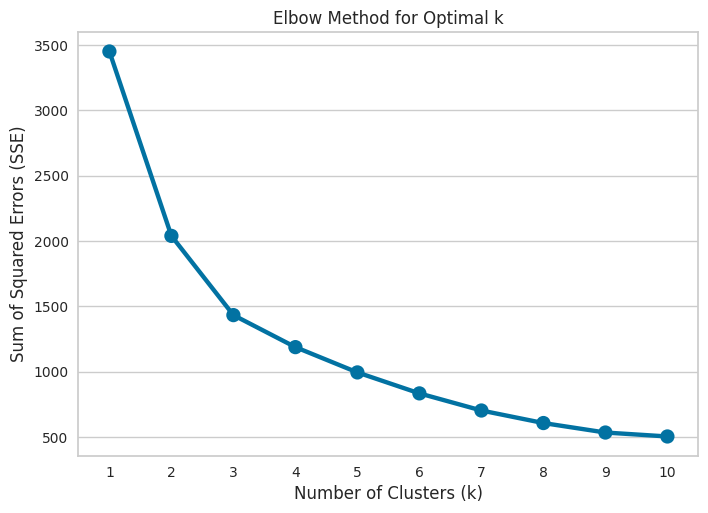

<Figure size 800x550 with 0 Axes>

In [ ]:
SSE=[]
for k in range (0,10):
  kmeans=KMeans(n_clusters=k+1, random_state=128).fit(seg_df.iloc[:,9:])
  SSE.append(kmeans.inertia_)
sns.pointplot(x=list(range(1,11)),y=SSE)
sns.set_style("whitegrid")
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=12)
plt.figure()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



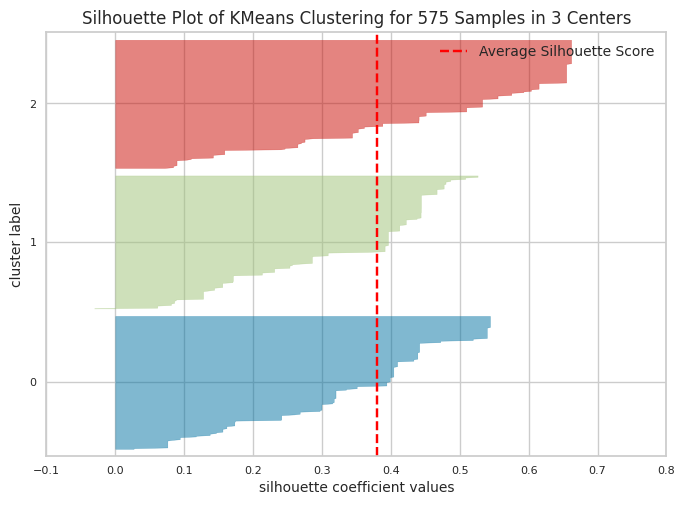

In [ ]:
#Représentation du graphique de silhouette visualizer
from yellowbrick.cluster.silhouette import silhouette_visualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
plt.xlabel('Number of Clusters (k)', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

silhouette_visualizer(KMeans(3,random_state=128),seg_df.iloc[:,9:], colors="yellowbrick")
sns.set_style("whitegrid")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



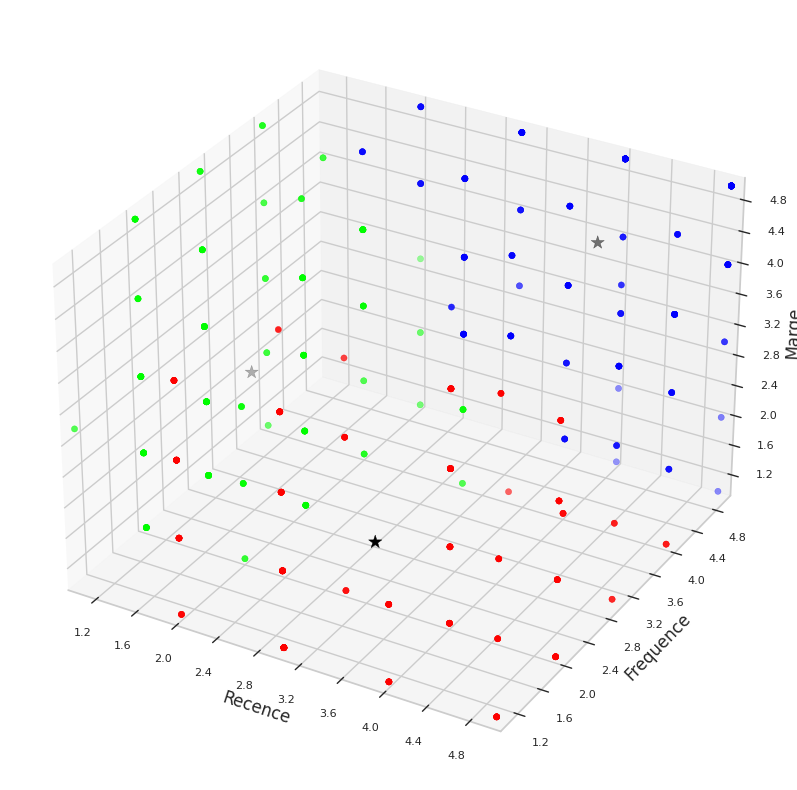

In [ ]:
#Mise en place du model kmeans avec les 5 cluster choisis sur le graphique de l'inertie
model=KMeans(n_clusters=3, random_state=100).fit(seg_df.iloc[:,9:])
centers=model.cluster_centers_
fig=plt.figure(figsize=(10,10))
#Représentation en 3D des clusters
ax=fig.add_subplot(111,projection='3d')
scatter=ax.scatter(seg_df.iloc[:,9],seg_df.iloc[:,10],seg_df.iloc[:,11],cmap="brg",c=model.predict(seg_df.iloc[:,9:]))

ax.set_xlabel('Recence', fontsize=12)
ax.set_ylabel('Frequence', fontsize=12)
ax.set_zlabel('Marge', fontsize=12)

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', marker='*', s=100)
# Set the limits for the x, y, and z axes to reduce the scale
ax.set_xlim([min(seg_df.iloc[:, 9]) , max(seg_df.iloc[:, 9])])
ax.set_ylim([min(seg_df.iloc[:, 10]) , max(seg_df.iloc[:, 10]) ])
ax.set_zlim([min(seg_df.iloc[:, 11]) , max(seg_df.iloc[:, 11]) ])
# Add a colorbar to show the cluster color mapping

num_ticks =10
ax.xaxis.set_major_locator(MaxNLocator(num_ticks))
ax.yaxis.set_major_locator(MaxNLocator(num_ticks))
ax.zaxis.set_major_locator(MaxNLocator(num_ticks))
ax.set_facecolor('white')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='z', labelsize=8)
plt.savefig("clus_rfm_score")

# Show the 3D plot
plt.show()

<function matplotlib.pyplot.legend(*args, **kwargs)>

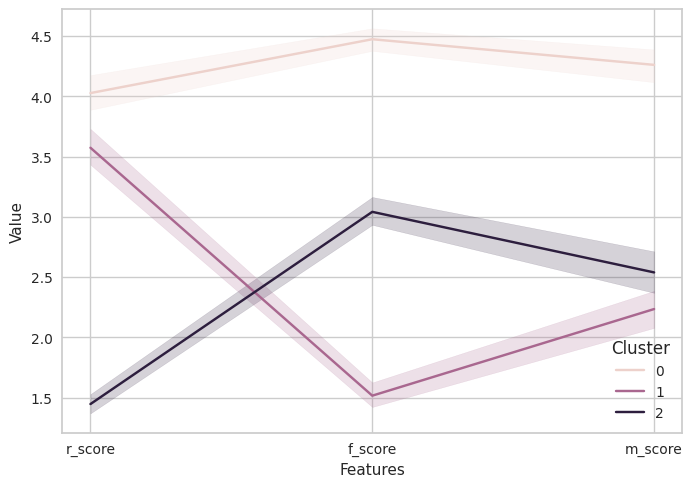

In [ ]:
seg_df['Cluster']=model.labels_
melted_rfm_norm=pd.melt(seg_df.reset_index(),
                        id_vars=['Cluster'],
                        value_vars=['r_score','f_score','m_score'],
                        var_name='Features',
                        value_name='Value')
sns.lineplot(x='Features',y='Value', hue='Cluster', data=melted_rfm_norm)
plt.legend

In [ ]:
seg_df.groupby('Cluster').agg({'r_score':['mean','min','max'],
                            'f_score':['mean','min','max'],
                            'm_score':['mean','min','max','count']})

#Cluster 0 : Bon Clients
#Cluster 1 : Moyens
#Cluster 2 : Moins rentables

r_score           f_score           m_score              
             mean min max      mean min max      mean min max count
Cluster                                                            
0        4.026596   2   5  4.473404   2   5  4.260638   1   5   188
1        3.572917   2   5  1.515625   1   4  2.234375   1   5   192
2        1.446154   1   3  3.041026   1   5  2.538462   1   5   195

In [ ]:
seg_df

,Entité,Code_Client,Nom_CLIENT,CA,F,Marge,R,Taux_marge,Date_Facture,r_score,f_score,m_score,Cluster
541,ROUEN,62063,"SINOTRANS ZHEJIANG CO, LTD WENZHOU",1410.75,2,-1550.52,17.000000,-1.099075,2023-09-13 00:00:00,2,4,1,2
508,ROUEN,49308,GEVEKO MARKINGS SAS,2604.00,1,-385.40,8.000000,-0.148003,2023-09-22 00:00:00,3,1,1,1
620,ROUEN,88389,LES CIMENTS DU SAHEL,4988.00,7,-330.43,3.000000,-0.066245,2023-09-27 00:00:00,5,5,1,0
385,ROUEN,5542,LYS PACKAGING,2163.00,1,-307.63,27.000000,-0.142224,2023-09-03 00:00:00,1,3,1,2
348,ROUEN,4006,SOLUTION IMPORT,5036.00,3,-229.50,6.000000,-0.045572,2023-09-24 00:00:00,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,MONTOIR,62100,MAKE DISTRIBUTION,137895.00,43,23117.06,3.000000,0.167642,2023-09-27 00:00:00,5,5,5,0
270,DUNKERQUE,5744,IKO AXTER AUSTRALIA,164669.17,4,26356.44,5.000000,0.160057,2023-09-25 00:00:00,4,5,5,0
216,MARSEILLE,88090,ExtenC,196244.95,70,32560.02,0.298924,0.165915,2023-09-29 16:49:33,5,5,5,0
565,ROUEN,70044,SMCI GROUPE CAILLE,146409.52,9,36517.75,1.000000,0.249422,2023-09-29 00:00:00,5,5,5,0


In [ ]:
# Sélectionner les lignes du cluster 0 et les colonnes "Entité", "Nom" et "Marge"
cluster_0_clients = seg_df[seg_df["Cluster"] == 0][["Entité", "Nom_CLIENT ","F" , "R","CA" ,"Marge ","Taux_marge", "Date_Facture"]]

# Convertir le DataFrame en une liste de dictionnaires
liste_clients_cluster_0 = cluster_0_clients.to_dict(orient="records")
clients_cluster_0 = pd.DataFrame(liste_clients_cluster_0)
# Afficher la liste des clients du cluster 0
clients_cluster_0.sort_values(by='Marge ', ascending=False)

,Entité,Nom_CLIENT,F,R,CA,Marge,Taux_marge,Date_Facture
187,MARSEILLE,PONANT,19,3.000000,296706.01,39179.20,0.132047,2023-09-27 00:00:00
186,ROUEN,SMCI GROUPE CAILLE,9,1.000000,146409.52,36517.75,0.249422,2023-09-29 00:00:00
185,MARSEILLE,ExtenC,70,0.298924,196244.95,32560.02,0.165915,2023-09-29 16:49:33
184,DUNKERQUE,IKO AXTER AUSTRALIA,4,5.000000,164669.17,26356.44,0.160057,2023-09-25 00:00:00
183,MONTOIR,MAKE DISTRIBUTION,43,3.000000,137895.00,23117.06,0.167642,2023-09-27 00:00:00
...,...,...,...,...,...,...,...,...
4,MARSEILLE,PANACEA LOGISTICS PVT LTD,2,8.000000,2170.08,364.00,0.167736,2023-09-22 00:00:00
3,MARSEILLE,SETCARGO INTERNATIONAL,2,3.000000,482.00,354.48,0.735436,2023-09-27 00:00:00
2,ROUEN,ALFI ADLER,2,1.000000,590.00,280.12,0.474780,2023-09-29 00:00:00
1,ROUEN,COMPAGNIE GENERALE D'EXPLOITATION,6,3.000000,807.00,206.82,0.256283,2023-09-27 00:00:00


In [ ]:
# Sélectionner les lignes du cluster 1 et les colonnes "Entité", "Nom" et "Marge"
cluster_1_clients = seg_df[seg_df["Cluster"] == 1][["Entité", "Nom_CLIENT ","F" , "R","CA" ,"Marge ","Taux_marge", "Date_Facture"]]

# Convertir le DataFrame en une liste de dictionnaires
liste_clients_cluster_1 = cluster_1_clients.to_dict(orient="records")
clients_cluster_1= pd.DataFrame(liste_clients_cluster_1)
# Afficher la liste des clients du cluster 1
clients_cluster_1.sort_values(by='Marge ', ascending=False)

,Entité,Nom_CLIENT,F,R,CA,Marge,Taux_marge,Date_Facture
191,ROUEN,MANITRA,1,3.0,14942.00,3463.83,0.231818,2023-09-27
190,MARSEILLE,PARIS GASTRONOMY DISTRIBUTION,1,3.0,7153.00,1984.90,0.277492,2023-09-27
189,ROUEN,TOWERCO OF MADAGASCAR,1,10.0,17585.00,1809.00,0.102872,2023-09-20
188,ROUEN,AVM,1,11.0,7540.00,1744.04,0.231305,2023-09-19
187,ROUEN,GREEN FUTURE SARL,1,2.0,9775.20,1657.05,0.169516,2023-09-28
...,...,...,...,...,...,...,...,...
4,ROUEN,LOGISTIQUE TRANSIT POLYNESIE,1,11.0,110.00,-5.00,-0.045455,2023-09-19
3,ROUEN,TRAMAR ATI,2,7.0,236.74,-22.53,-0.095168,2023-09-23
2,ROUEN,AMDT,1,9.0,957.00,-89.08,-0.093083,2023-09-21
1,ROUEN,SOLUTION IMPORT,3,6.0,5036.00,-229.50,-0.045572,2023-09-24


In [ ]:
# Sélectionner les lignes du cluster 1 et les colonnes "Entité", "Nom" et "Marge"
cluster_2_clients = seg_df[seg_df["Cluster"] == 2][["Entité", "Nom_CLIENT ","F" , "R","CA" ,"Marge ","Taux_marge","Date_Facture"]]

# Convertir le DataFrame en une liste de dictionnaires
liste_clients_cluster_2 = cluster_2_clients.to_dict(orient="records")
clients_cluster_2= pd.DataFrame(liste_clients_cluster_2)
# Afficher la liste des clients du cluster 2
clients_cluster_2.sort_values(by='Marge ', ascending=False)

,Entité,Nom_CLIENT,F,R,CA,Marge,Taux_marge,Date_Facture
194,DUNKERQUE,BOUE TRANSMISSION ET CARRIERES,1,23.0,14277.00,6307.00,0.441759,2023-09-07
193,ROUEN,RL FRET,3,19.0,20115.00,5802.42,0.288462,2023-09-11
192,ROUEN,EUROTRADE,1,16.0,4377.00,4372.00,0.998858,2023-09-14
191,MARSEILLE,SPES,1,20.0,5559.00,4254.00,0.765246,2023-09-10
190,ROUEN,LABORATOIRES VRANGIER,1,17.0,7275.00,3353.73,0.460994,2023-09-13
...,...,...,...,...,...,...,...,...
4,MARSEILLE,C.I.L.A.M. PLF,15,13.0,10109.04,-3.04,-0.000301,2023-09-17
3,ROUEN,EPUREAU CI,3,16.0,6005.10,-9.55,-0.001590,2023-09-14
2,MARSEILLE,AOSTE SNC,1,17.0,605.17,-135.78,-0.224367,2023-09-13
1,ROUEN,LYS PACKAGING,1,27.0,2163.00,-307.63,-0.142224,2023-09-03
